<h3>Import</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv')


C:\Users\arell\AppData\Local\Temp\ipykernel_21848\318923745.py:10: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv')


<h3>Basic Data</h3>

In [2]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type,url_type
0,0,1,4,0.0,0,3.250000,NaN,4,0,16,...,0,0,3.375000,0.000000,3.375000,0.000000,0.000000,0.000000,0,phishing
1,0,1,6,0.0,0,5.000000,NaN,9,0,35,...,0,0,4.079143,0.000000,4.079143,3.454822,2.000000,0.000000,0,benign
2,0,1,6,0.0,0,4.333333,NaN,6,0,31,...,0,0,3.708093,0.000000,3.708093,2.321928,1.584963,0.000000,0,benign
3,49,4,3,4.5,7,2.666667,be,22,0,88,...,0,5,4.660343,3.308751,3.121928,2.947703,0.918296,4.280341,0,defacement
4,194,3,3,7.0,9,2.666667,net,33,0,235,...,0,3,5.491293,3.501398,3.121928,2.947703,0.918296,5.360074,0,defacement


In [4]:
non_numerical_columns = df.select_dtypes(exclude=['number']).columns
print(non_numerical_columns)

Index(['tld', 'url_type'], dtype='object')


In [4]:
unique_values = df['URL_Type_obf_Type'].unique()
print(unique_values)

df.info()



[0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 81 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Querylength                      651191 non-null  int64  
 1   domain_token_count               651191 non-null  int64  
 2   path_token_count                 651191 non-null  int64  
 3   avgdomaintokenlen                651191 non-null  float64
 4   longdomaintokenlen               651191 non-null  int64  
 5   avgpathtokenlen                  651191 non-null  float64
 6   tld                              187997 non-null  object 
 7   charcompvowels                   651191 non-null  int64  
 8   charcompace                      651191 non-null  int64  
 9   ldl_url                          651191 non-null  int64  
 10  ldl_domain                       651191 non-null  int64  
 11  ldl_path                         651191 non-null  int64  
 12

In [18]:
# Menghitung jumlah data untuk setiap label
label_counts = df['URL_Type_obf_Type'].value_counts()

# Menampilkan hasil
print(label_counts)

URL_Type_obf_Type
Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: count, dtype: int64


In [19]:
# Group by 'URL_Type_obf_Type' and select the first row for each unique type
unique_rows = df.groupby('URL_Type_obf_Type', as_index=False).first()

# Display the unique rows in a table format in Jupyter Notebook
unique_rows

,URL_Type_obf_Type,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
0,Defacement,0,4,5,5.500000,14,4.400000,4,8,3,...,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,0.000000,-1.0
1,benign,0,2,12,5.500000,8,4.083334,2,15,7,...,-1,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.000000,-1.0
2,malware,0,3,8,4.000000,5,21.500000,3,19,26,...,5,1,0,-1,0.648129,0.798231,0.820863,0.571441,0.725662,-1.0
3,phishing,166,3,31,3.666667,5,2.000000,3,57,44,...,-1,-1,-1,-1,0.600134,0.875275,-1.000000,-1.000000,-1.000000,-1.0
4,spam,0,4,4,4.750000,8,3.500000,4,3,1,...,1,1,0,-1,0.761381,0.829219,0.898227,1.000000,1.000000,-1.0


In [20]:
# Group the data by 'URL_Type_obf_Type' and calculate the mean of each numerical column
mean_values = df.groupby('URL_Type_obf_Type').mean()

# Simply display the DataFrame (works well in Jupyter)
mean_values

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
URL_Type_obf_Type,,,,,,,,,,,,,,,,,,,,,
Defacement,24.882598,3.015511,8.810593,5.655685,11.042875,3.126518,3.015511,16.056494,9.411980,0.717654,...,-0.091803,6.591551,5.581841,4.716015,0.727064,0.820279,0.645543,0.734075,0.677447,0.289336
benign,4.057705,2.082894,10.557255,5.270317,7.889988,4.882875,2.082894,15.723943,9.809922,0.755558,...,1.635137,1.310500,0.744377,0.123506,0.711942,0.883778,0.568955,0.583354,0.199674,-0.641047
malware,7.497467,2.706943,9.487038,5.275628,8.724374,4.668064,2.706943,12.945322,8.572408,1.459476,...,2.214690,3.939809,2.833582,2.314362,0.721213,0.848507,0.663595,0.706692,0.532947,-0.140865
phishing,2.818613,3.016346,6.343396,6.448547,12.219879,5.722125,3.016346,9.517269,6.950830,3.095966,...,2.619035,0.933957,0.250989,-0.448326,0.731676,0.823926,0.699844,0.783321,0.430505,-0.808700
spam,75.184234,3.540908,9.687519,4.194429,8.588683,4.483400,3.540908,21.048074,16.985369,11.738877,...,2.491042,5.397133,4.118841,2.892057,0.719434,0.835562,0.805423,0.778192,0.730271,0.314351


In [7]:
print(df.columns)

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

<h3>Statistics</h3>

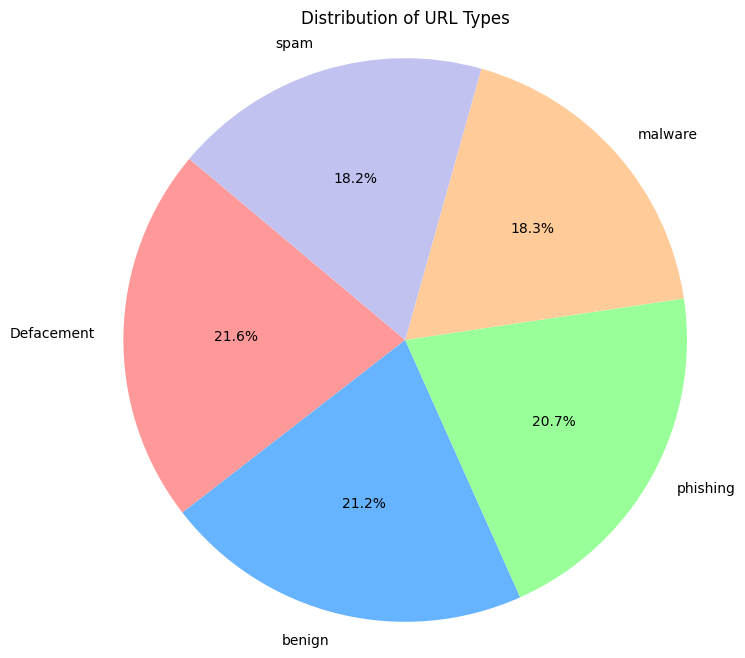

In [21]:
# Count the occurrences of each URL type
type_counts = df['URL_Type_obf_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Equal aspect ratio ensures the pie chart is drawn as a circle
plt.axis('equal')
plt.title("Distribution of URL Types")
plt.show()

<h4>Heat Map | Attack vs Mean of Features</h4>

Mean Query Lengths by URL Type:
URL_Type_obf_Type
Defacement    24.882598
benign         4.057705
malware        7.497467
phishing       2.818613
spam          75.184234
Name: Querylength, dtype: float64


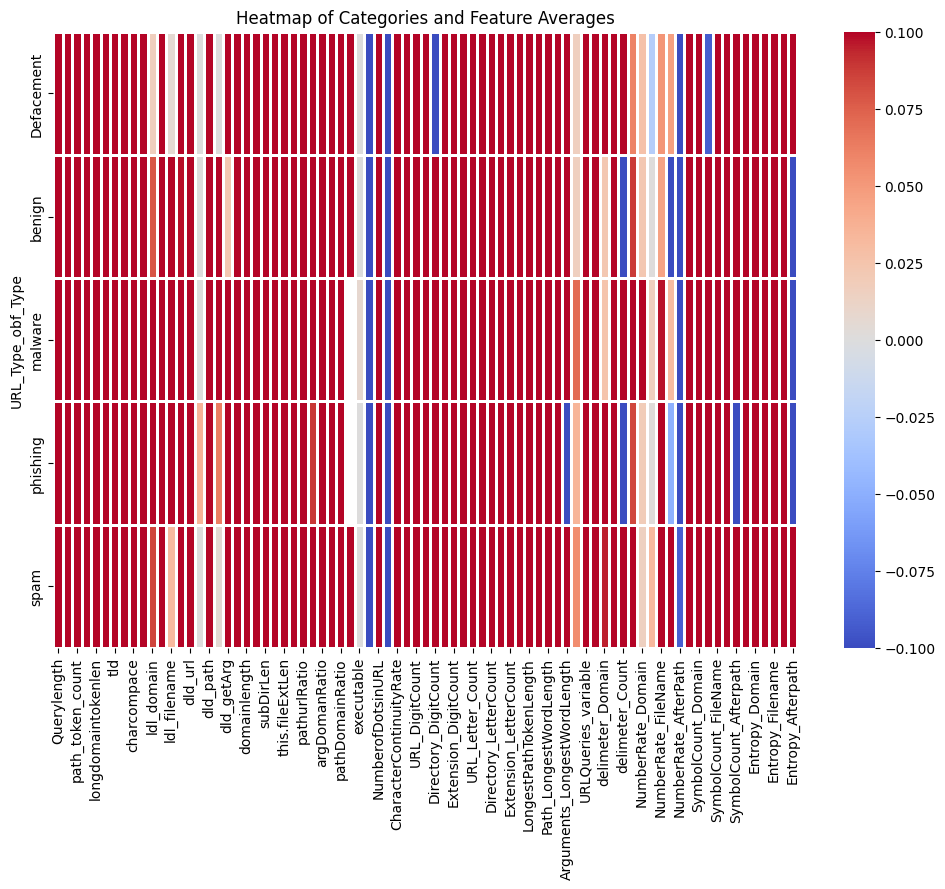

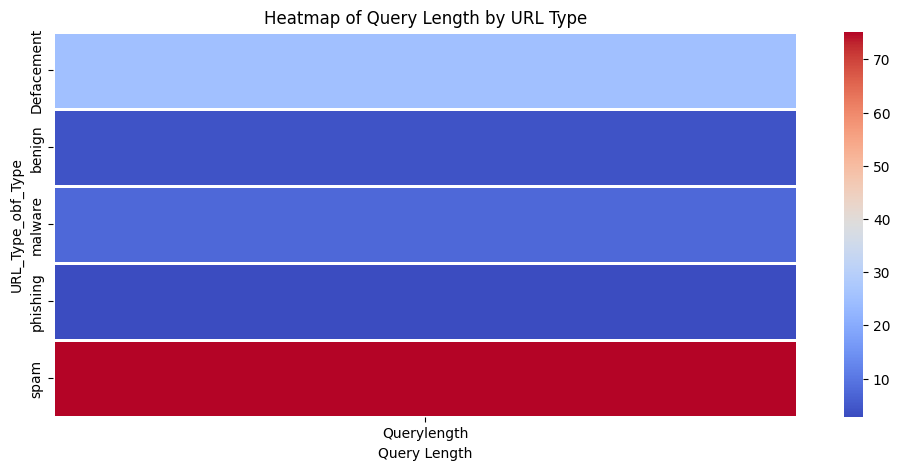

In [22]:
# Group the data by 'URL_Type_obf_Type' and calculate the mean of each numerical column
grouped_df = df.groupby('URL_Type_obf_Type').mean()

# Print out the mean values for 'querylength' to compare directly
print("Mean Query Lengths by URL Type:")
print(grouped_df['Querylength'])  # Adjust this to match your actual column name

# Plot the heatmap (focusing on selected features if needed)
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, cmap='coolwarm', cbar=True, linewidths=1)
plt.title('Heatmap of Categories and Feature Averages')
plt.show()

# Optionally, create a focused heatmap for a specific feature like 'querylength'
plt.figure(figsize=(12, 5))
sns.heatmap(grouped_df[['Querylength']], cmap='coolwarm', cbar=True, linewidths=1)
plt.title('Heatmap of Query Length by URL Type')
plt.xlabel('Query Length')
plt.show()

<h4>Heat Map | Attack vs Features</h4>

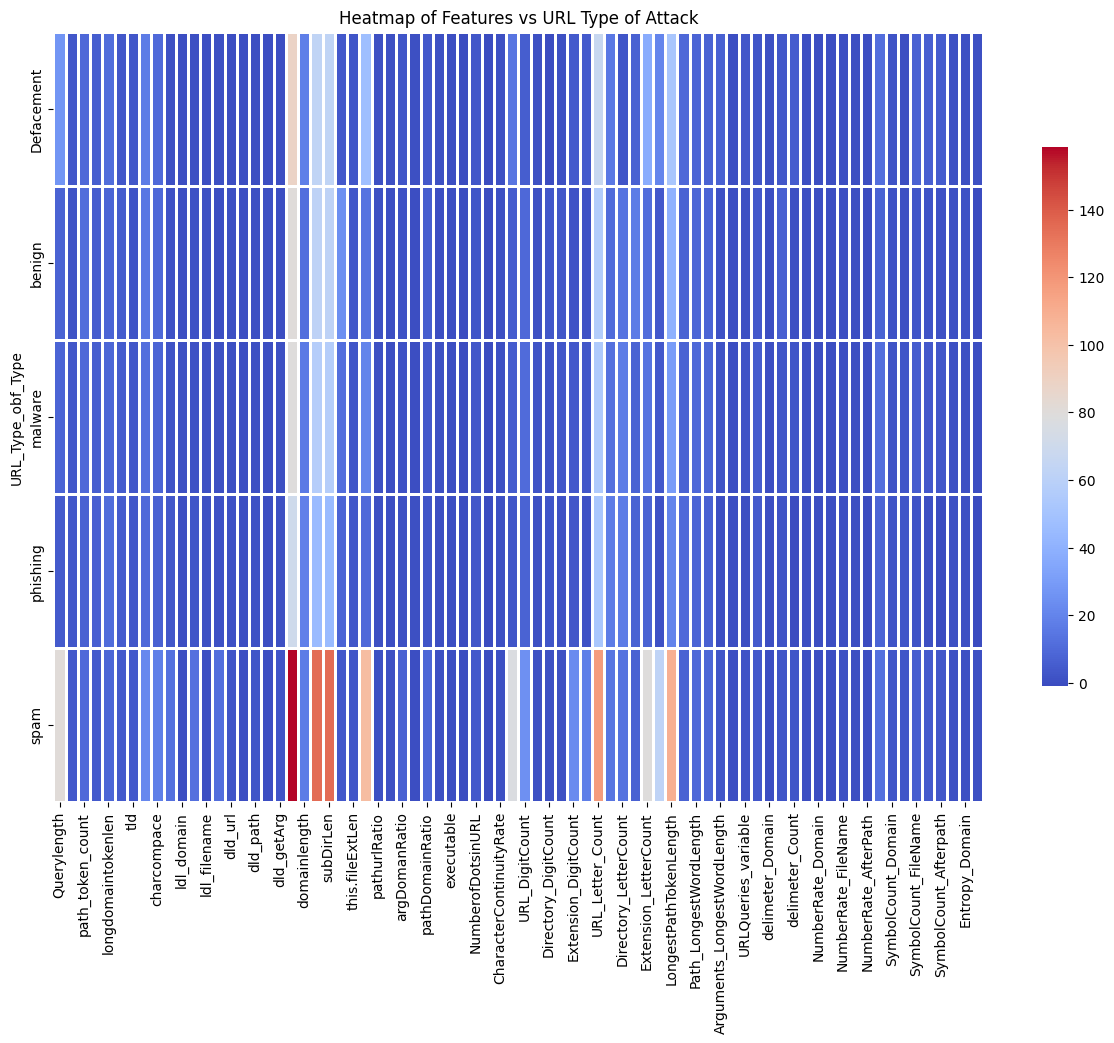

In [27]:
# Group by 'URL_Type_obf_Type' and calculate the mean of each feature
grouped_df = df.groupby('URL_Type_obf_Type').mean()

# Set the figure size for the heatmap
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(grouped_df, cmap='coolwarm', cbar=True, cbar_kws={'shrink': 0.7},  annot=False, linewidths=1)


# Add a title to the heatmap
plt.title('Heatmap of Features vs URL Type of Attack')

# Display the heatmap
plt.show()


<h3>Cleaning | Drop Null, Inf</h3>

In [24]:
# Check for NaN values
print("NaN values in dataset:")
print(df.isna().sum())

# Check for Infinite values
print("Infinity values in dataset:")
print(np.isinf(df).sum())

NaN values in dataset:
Querylength                 0
domain_token_count          0
path_token_count            0
avgdomaintokenlen           0
longdomaintokenlen          0
                         ... 
Entropy_DirectoryName    8468
Entropy_Filename          236
Entropy_Extension          40
Entropy_Afterpath           6
URL_Type_obf_Type           0
Length: 80, dtype: int64
Infinity values in dataset:


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [25]:
#Drop Null Values
# List of columns to drop
columns_to_drop = ['Entropy_DirectoryName', 'Entropy_Filename', 'Entropy_Extension']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [26]:
# Replace Inf and -Inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Check for null values in the dataset
null_values = df.isnull().sum()

# Display the null values in each column
print("Null values in each column:")
print(null_values)

Null values in each column:
Querylength              0
domain_token_count       0
path_token_count         0
avgdomaintokenlen        0
longdomaintokenlen       0
                        ..
SymbolCount_Afterpath    0
Entropy_URL              0
Entropy_Domain           0
Entropy_Afterpath        0
URL_Type_obf_Type        0
Length: 77, dtype: int64


<h3>Exploration</h3>

<h4>PCA</h4>

In [19]:
df_wo_url = df.select_dtypes(include=['number'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_wo_url)

# Step 2: Apply PCA
pca = PCA(n_components=None)  # All components
pca.fit(scaled_data)

# Step 3: Analyze explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

# Step 4: Extract feature importance
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=df_wo_url.columns)

# Step 5: Rank features by importance for the first principal component
feature_importance_pc1 = loadings_df.iloc[0].abs().sort_values(ascending=False)
print("Top features for PC1:")
print(feature_importance_pc1)

# Step 6: (Optional) Select top features
# For example, choose the top 5 important features from the first principal component
top_features = feature_importance_pc1.index[:5]
print("Top 5 important features:", top_features)

# Select top features from the dataset
#df_filtered = df[top_features]


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [5]:
model_features = ['Querylength', 'domain_token_count', 'path_token_count',
                  'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
                  'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
                  'ldl_filename', 'ldl_getArg', 'dld_domain', 'dld_path', 'dld_filename', 'dld_getArg', 
                  'urlLen', 'domainlength', 'pathLength', 'subDirLen', 'fileNameLen', 'this.fileExtLen', 
                  'ArgLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 
                  'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 
                  'CharacterContinuityRate', 'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
                  'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount',
                  'URL_Letter_Count', 'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount',
                  'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 
                  'Path_LongestWordLength', 'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
                  'URL_sensitiveWord', 'URLQueries_variable', 'spcharUrl', 'delimeter_Domain', 'delimeter_path', 
                  'delimeter_Count', 'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName', 
                  'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 
                  'SymbolCount_Domain', 'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 
                  'SymbolCount_Afterpath', 'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension',
                  'Entropy_Afterpath']

dataset_columns = df.columns.tolist()

extra_in_dataset = list(set(dataset_columns) - set(model_features))
missing_in_dataset = list(set(model_features) - set(dataset_columns))

print(f"Extra columns in dataset: {extra_in_dataset}")
print(f"Missing columns in dataset: {missing_in_dataset}")

Extra columns in dataset: ['URL_Type_obf_Type', 'Entropy_DirectoryName', 'url_type', 'dld_url']
Missing columns in dataset: []
